In [1]:
import torch
from torch import optim
import torch.nn as nn
import numpy as np
import pandas as pd
import os
from torch.utils.data.dataset import IterableDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
# from audtorch.metrics.functional import *
import shutil
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts

In [2]:
class MyModel(nn.Module):
    def __init__(
            self,
            input_dim: int =769,
            hidden_dim: int = 15,
            output_dim: int = 2):
        super().__init__()
        self.gru1 = nn.GRU(input_dim, hidden_dim, batch_first=True, num_layers=1)
        self.gru2 = nn.GRU(16, hidden_dim, batch_first=True, num_layers=1)
        self.hidden = nn.BatchNorm1d(hidden_dim)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x1):
        # (bat_size, seq, features)
        l_x1, _ = self.gru1(x1[:,  -1, :769])
        #l_x1 = l_x1[:, :, :] #(bat_size, features)
        #print(l_x1.shape)
        #combined_input = torch.cat((l_x1, x1[:, :, 769:770]), dim=2) # 连接在特征维度上
        #print(x1[:, :, 769:770].shape)
        #print(combined_input.shape)
        #l_x2, _ = self.gru2(combined_input)
        #l_x2 = l_x2[:, -1, :] #(bat_size, features)
        #print(l_x2.shape)
        hidden = self.hidden(l_x1)
        #print(hidden.shape)
        output = self.linear(hidden)
        #print(output.shape)
        return output

In [2]:
class MyModel(nn.Module):
    def __init__(
            self,
            input_dim: int =769,
            hidden_dim: int = 15,
            output_dim: int = 2):
        super().__init__()
        self.gru1 = nn.GRU(input_dim, hidden_dim, batch_first=True, num_layers=1)
        self.gru2 = nn.GRU(1, hidden_dim, batch_first=True, num_layers=1)
        self.gru3 = nn.GRU(30, hidden_dim, batch_first=True, num_layers=1)
        
        self.hidden = nn.BatchNorm1d(hidden_dim)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, x1):
        # (bat_size, seq, features)
        l_x1, _ = self.gru1(x1[:, :, :769])
        #l_x1 = l_x1[:, :, :] #(bat_size, features)
        #print(l_x1.shape)
        l_x2, _ = self.gru2(x1[:, :, 769:770])
        combined_input = torch.cat((l_x1, l_x2), dim=2) # 连接在特征维度上
        #print(x1[:, :, 769:770].shape)
        #print(combined_input.shape)
        l_x3, _ = self.gru3(combined_input)
        l_x3 = l_x3[:, -1, :] #(bat_size, features)
        #print(l_x2.shape)
        hidden = self.hidden(l_x3)
        #print(hidden.shape)
        output = self.linear(hidden)
        #print(output.shape)
        return output

In [33]:
class MyModel(nn.Module):
    def __init__(
            self,
            input_dim: int =769,
            hidden_dim: int = 15,
            output_dim: int = 2):
        super().__init__()
        self.gru1 = nn.GRU(input_dim, hidden_dim, batch_first=True, num_layers=1)
        self.hidden = nn.BatchNorm1d(hidden_dim)
        self.linear = nn.Linear(30, output_dim)

    def forward(self, x1):
        # (bat_size, seq, features)
        l_x1, _ = self.gru1(x1[:, :, :769])
        l_x1 = l_x1[:, -1, :] #(bat_size, features)
        #print(l_x1.shape)
        hidden = self.hidden(l_x1)
        #print(hidden.shape)
        combined_input = torch.cat((hidden, x1[:, :, 769]), dim=1) # 连接在特征维度上
        #print(combined_input.shape)
        #print(hidden.shape)
        
        output = self.linear(combined_input)
        #print(output.shape)
        return output

In [3]:
class Mydataset(IterableDataset):
    def __init__(self,data1, label) -> None:
            super().__init__()
            self.data1 = data1.astype(np.float32)
            self.label = label.astype(np.float32)
    def __len__(self):
        return len(self.data1)
    def __iter__(self):
        for row in range(len(self.data1)):
            yield self.data1[row], self.label[row]

In [4]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2019_output_1.pkl', ]#'data/default/2021_3_output.pkl', 'data/default/2021_4_output.pkl', ]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X11 = pickle.load(f)
    X11 = np.nan_to_num(X11, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X11 = np.concatenate((X11, data), axis=1)
        print(X11.shape)
# 打印导入的数据列表
X11 = X11.sum(axis=0)
print(X11.shape)

(58, 242, 769)


In [5]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2019_output_2.pkl', ]#'data/default/2021_3_output.pkl', 'data/default/2021_4_output.pkl', ]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X12 = pickle.load(f)
    X12 = np.nan_to_num(X12, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X12 = np.concatenate((X12, data), axis=1)
        print(X12.shape)
# 打印导入的数据列表
X12 = X12.sum(axis=0)
print(X12.shape)

(60, 242, 769)


In [6]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2019_output_3.pkl', ]#'data/default/2021_3_output.pkl', 'data/default/2021_4_output.pkl', ]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X13 = pickle.load(f)
    X13 = np.nan_to_num(X13, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X13 = np.concatenate((X13, data), axis=1)
        print(X13.shape)
# 打印导入的数据列表
X13 = X13.sum(axis=0)
print(X13.shape)

(65, 242, 769)


In [7]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2019_output_4.pkl', ]#'data/default/2021_3_output.pkl', 'data/default/2021_4_output.pkl', ]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X14 = pickle.load(f)
    X14 = np.nan_to_num(X14, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X14 = np.concatenate((X14, data), axis=1)
        print(X14.shape)
# 打印导入的数据列表
X14 = X14.sum(axis=0)
print(X14.shape)

(61, 242, 769)


In [8]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2020_output_1.pkl',]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X21 = pickle.load(f)
    X21 = np.nan_to_num(X21, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X21 = np.concatenate((X21, data), axis=1)
        print(X21.shape)
# 打印导入的数据列表
X21 = X21.sum(axis=0)
print(X21.shape)

(58, 242, 769)


In [9]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2020_output_2.pkl',]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X22 = pickle.load(f)
    X22 = np.nan_to_num(X22, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X22 = np.concatenate((X22, data), axis=1)
        print(X22.shape)
# 打印导入的数据列表
X22 = X22.sum(axis=0)
print(X22.shape)

(59, 242, 769)


In [10]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2020_output_3.pkl',]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X23 = pickle.load(f)
    X23 = np.nan_to_num(X23, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X23 = np.concatenate((X23, data), axis=1)
        print(X23.shape)
# 打印导入的数据列表
X23 = X23.sum(axis=0)
print(X23.shape)

(66, 242, 769)


In [11]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2020_output_4.pkl',]#'data/default/2021_5_output.pkl', 'data/default/2021_6_output.pkl', 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X24 = pickle.load(f)
    X24 = np.nan_to_num(X24, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X24 = np.concatenate((X24, data), axis=1)
        print(X24.shape)
# 打印导入的数据列表
X24 = X24.sum(axis=0)
print(X24.shape)

(60, 242, 769)


In [12]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2021_output_1.pkl',]# 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X31 = pickle.load(f)
    X31 = np.nan_to_num(X31, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X31 = np.concatenate((X31, data), axis=1)
        print(X31.shape)
# 打印导入的数据列表
X31 = np.nan_to_num(X31, nan=0)
X31 = X31.sum(axis=0)
print(X31.shape)

(58, 242, 769)


In [13]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2021_output_2.pkl',]# 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X32 = pickle.load(f)
    X32 = np.nan_to_num(X32, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X32 = np.concatenate((X32, data), axis=1)
        print(X32.shape)
# 打印导入的数据列表
X32 = np.nan_to_num(X32, nan=0)
X32 = X32.sum(axis=0)
print(X32.shape)

(60, 242, 769)


In [14]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2021_output_3.pkl',]# 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X33 = pickle.load(f)
    X33 = np.nan_to_num(X33, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X33 = np.concatenate((X33, data), axis=1)
        print(X33.shape)
# 打印导入的数据列表
X33 = np.nan_to_num(X33, nan=0)
X33 = X33.sum(axis=0)
print(X33.shape)

(64, 242, 769)


In [15]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2021_output_4.pkl',]# 'data/default/2021_7_output.pkl', 'data/default/2021_8_output.pkl']

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X34 = pickle.load(f)
    X34 = np.nan_to_num(X34, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X34 = np.concatenate((X34, data), axis=1)
        print(X34.shape)
# 打印导入的数据列表
X34 = np.nan_to_num(X34, nan=0)
X34 = X34.sum(axis=0)
print(X34.shape)

(61, 242, 769)


In [16]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2022_output_1.pkl' , ]

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X41 = pickle.load(f)
    X41 = np.nan_to_num(X41, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X41 = np.concatenate((X41, data), axis=1)
        print(X41.shape)
# 打印导入的数据列表
X41 = np.nan_to_num(X41, nan=0)
X41 = X41.sum(axis=0)
print(X41.shape)

(58, 242, 769)


In [17]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2022_output_2.pkl' , ]

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X42 = pickle.load(f)
    X42 = np.nan_to_num(X42, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X42 = np.concatenate((X42, data), axis=1)
        print(X42.shape)
# 打印导入的数据列表
X42 = np.nan_to_num(X42, nan=0)
X42 = X42.sum(axis=0)
print(X42.shape)

(59, 242, 769)


In [18]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2022_output_3.pkl' , ]

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X43 = pickle.load(f)
    X43 = np.nan_to_num(X43, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X43 = np.concatenate((X43, data), axis=1)
        print(X43.shape)
# 打印导入的数据列表
X43 = np.nan_to_num(X43, nan=0)
X43 = X43.sum(axis=0)
print(X43.shape)

(65, 242, 769)


In [19]:
import pickle
import numpy as np

# 定义 pickle 文件名列表
pickle_files = ['/mnt/weka/home/test/yujichong_share/data/default_acc/2022_output_4.pkl' , ]

# 初始化 concatenated_array
with open(pickle_files[0], 'rb') as f:
    X44 = pickle.load(f)
    X44 = np.nan_to_num(X44, nan=0)
# 循环遍历 pickle 文件名列表，逐个导入 pickle 文件
for file in pickle_files[1:]:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        data = np.nan_to_num(data, nan=0)
        X44 = np.concatenate((X44, data), axis=1)
        print(X44.shape)
# 打印导入的数据列表
X44 = np.nan_to_num(X44, nan=0)
X44 = X44.sum(axis=0)
print(X44.shape)

(60, 242, 769)


In [20]:
X = np.concatenate((X11, X12, X13, X14,X21, X22, X23, X24,X31, X32, X33, X34,X41, X42, X43, X44), axis=0)
#242变60版本
#X=X[:,:240,:]
#X_agg = X.sum(axis=1).reshape((243, 60, 769))
#X = np.concatenate([X[:, i:i+4, :].sum(axis=1, keepdims=True) for i in range(0, 242, 4)], axis=1)
X = np.delete(X, 120, axis=1)
X=X[:,:225,:]
X.shape


(972, 225, 769)

In [21]:
n_sample = 0
len_minute=15
x0 = np.zeros(
    (int(X.shape[0] * (X.shape[1] -len_minute+1)), len_minute, X.shape[2]))
for i in range(0, X.shape[0]):
    #for j in range(0,X.shape[1] -len_minute+1,5):
    for j in range(0,X.shape[1] -len_minute+1):
        x1_one = X[i, j:j + len_minute]
        x0[n_sample, :, :] = x1_one
        n_sample += 1
    e_index = n_sample
x0 = x0[:n_sample, :]
#x0=x0[102757:, :]
#x0=x0[51484:, :]
#x0=x0[20941:, :]
#x0=x0[10492:, :]
x0.shape

(205092, 15, 769)

In [22]:
import datetime
import logging
logging.disable(logging.CRITICAL)
from higgsboom.MarketData.DDBSecurityMarketDataUtils import *


DDBSUtils=DDBSecurityMarketDataUtils(config={"Cluster":"Research",
                      "UserName":"maming",
                      "Password":"passwd123456"})

hs_min_df=DDBSUtils.IndexMinuteDataFrame('000300.SH','20190101','20230105',dataSource="TAQ")
hs_min_df
hs_min_df['hsshan0925'] = hs_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(1) - 1)
hs_min_df = hs_min_df[hs_min_df['hsshan0925'].notna()]
hs_min_df=hs_min_df.drop('hsshan0925', axis=1)


hs_min_df['return'] = hs_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(15) - 1)
#idx_min_df['return']=idx_min_df['return'].shift(-16)

hs_min_df
# #量价因子构造
# df_liangjia=idx_min_df.copy()
# #变成5min
hs_min_df['return1'] = hs_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(5) - 1)
#idx_min_df.iloc[:1000].to_csv('grumoxing.csv')
#idx_min_df
# #对Y矩阵构造
hs_min_df['return'] = hs_min_df.groupby('TRADING_DATE')['return'].shift(-30)
hs_min_df['return1'] = hs_min_df.groupby('TRADING_DATE')['return1'].shift(-20)
#idx_min_df.iloc[:1000].to_csv('grumoxing.csv')
#idx_min_df
hs_min_df = hs_min_df[hs_min_df['TRADING_DATE'] < '2023-01-01']
hs_min_df = hs_min_df[hs_min_df['return'].notna()]
hs_min_df['return_up_down'] = hs_min_df['return1'].apply(lambda x: 1 if x > 0 else 0)
hs_min_df
#降低采样频率
# def select_first_in_every_five(df):
#     return df.iloc[::5]
# idx_min_df = idx_min_df.groupby('TRADING_DATE').apply(select_first_in_every_five)
# idx_min_df=idx_min_df.reset_index(drop=True)
#idx_min_df
#选择时间区间
#idx_min_df= idx_min_df[idx_min_df['TRADING_DATE'] > '2020-12-31']
#idx_min_df
Yhs = hs_min_df.pivot(index='SYMBOL', columns='TRADING_TIME', values='return_up_down').to_numpy().T
print(Yhs.shape)

/tmp/ipykernel_2956854/258714747.py:11: DeprecationWarning: Call to deprecated method IndexMinuteDataFrame. (This function will be deprecated in version 2.0. Use func index_min_data in higgsboom.data.market.cnsecurity.CNSecurityMarketDataUtils instead.)
  hs_min_df=DDBSUtils.IndexMinuteDataFrame('000300.SH','20190101','20230105',dataSource="TAQ")


(205092, 1)


In [23]:
import datetime
import logging
logging.disable(logging.CRITICAL)
from higgsboom.MarketData.DDBSecurityMarketDataUtils import *


DDBSUtils=DDBSecurityMarketDataUtils(config={"Cluster":"Research",
                      "UserName":"maming",
                      "Password":"passwd123456"})

idx1000_min_df=DDBSUtils.IndexMinuteDataFrame('000852.SH','20190101','20230105',dataSource="TAQ")
idx1000_min_df['idx1000shan0925'] = idx1000_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(1) - 1)
idx1000_min_df = idx1000_min_df[idx1000_min_df['idx1000shan0925'].notna()]
idx1000_min_df=idx1000_min_df.drop('idx1000shan0925', axis=1)


idx1000_min_df['return'] = idx1000_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(15) - 1)
#idx_min_df['return']=idx_min_df['return'].shift(-16)

idx1000_min_df
# #量价因子构造
# df_liangjia=idx_min_df.copy()
# #变成5min
idx1000_min_df['return1'] = idx1000_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(5) - 1)
#idx_min_df.iloc[:1000].to_csv('grumoxing.csv')
#idx_min_df
# #对Y矩阵构造
idx1000_min_df['return'] = idx1000_min_df.groupby('TRADING_DATE')['return'].shift(-30)
idx1000_min_df['return1'] = idx1000_min_df.groupby('TRADING_DATE')['return1'].shift(-20)
#idx_min_df.iloc[:1000].to_csv('grumoxing.csv')
#idx_min_df
idx1000_min_df = idx1000_min_df[idx1000_min_df['TRADING_DATE'] < '2023-01-01']
idx1000_min_df = idx1000_min_df[idx1000_min_df['return'].notna()]
idx1000_min_df['return_up_down'] = idx1000_min_df['return1'].apply(lambda x: 1 if x > 0 else 0)
idx1000_min_df
#降低采样频率
# def select_first_in_every_five(df):
#     return df.iloc[::5]
# idx_min_df = idx_min_df.groupby('TRADING_DATE').apply(select_first_in_every_five)
# idx_min_df=idx_min_df.reset_index(drop=True)
#idx_min_df
#选择时间区间
#idx_min_df= idx_min_df[idx_min_df['TRADING_DATE'] > '2020-12-31']
#idx_min_df
Yidx1000 = idx1000_min_df.pivot(index='SYMBOL', columns='TRADING_TIME', values='return_up_down').to_numpy().T
print(Yidx1000.shape)

/tmp/ipykernel_2956854/692449597.py:11: DeprecationWarning: Call to deprecated method IndexMinuteDataFrame. (This function will be deprecated in version 2.0. Use func index_min_data in higgsboom.data.market.cnsecurity.CNSecurityMarketDataUtils instead.)
  idx1000_min_df=DDBSUtils.IndexMinuteDataFrame('000852.SH','20190101','20230105',dataSource="TAQ")


(205092, 1)


In [24]:
import datetime
import logging
logging.disable(logging.CRITICAL)
from higgsboom.MarketData.DDBSecurityMarketDataUtils import *


DDBSUtils=DDBSecurityMarketDataUtils(config={"Cluster":"Research",
                      "UserName":"maming",
                      "Password":"passwd123456"})

idx_min_df=DDBSUtils.IndexMinuteDataFrame('000905.SH','20190101','20230105',dataSource="TAQ")
idx_min_df['shan0925'] = idx_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(1) - 1)
idx_min_df = idx_min_df[idx_min_df['shan0925'].notna()]
idx_min_df=idx_min_df.drop('shan0925', axis=1)

idx_min_df['return'] = idx_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(15) - 1)
#idx_min_df['return']=idx_min_df['return'].shift(-16)

idx_min_df
# #量价因子构造
df_liangjia=idx_min_df.copy()
# #变成5min
idx_min_df['return1'] = idx_min_df.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(5) - 1)
#idx_min_df.iloc[:1000].to_csv('grumoxing.csv')
#idx_min_df
# #对Y矩阵构造
idx_min_df['return'] = idx_min_df.groupby('TRADING_DATE')['return'].shift(-30)
idx_min_df['return1'] = idx_min_df.groupby('TRADING_DATE')['return1'].shift(-20)
#idx_min_df.iloc[:1000].to_csv('grumoxing.csv')
#idx_min_df
idx_min_df = idx_min_df[idx_min_df['TRADING_DATE'] < '2023-01-01']
idx_min_df = idx_min_df[idx_min_df['return'].notna()]
idx_min_df['return_up_down'] = idx_min_df['return1'].apply(lambda x: 1 if x > 0 else 0)
idx_min_df['return_up_down1'] = (idx_min_df['return1']-(idx_min_df['return1']+idx1000_min_df['return1']+hs_min_df['return1'])/3).apply(lambda x: 1 if x > 0 else 0)
#降低采样频率
# def select_first_in_every_five(df):
#     return df.iloc[::5]
# idx_min_df = idx_min_df.groupby('TRADING_DATE').apply(select_first_in_every_five)
# idx_min_df=idx_min_df.reset_index(drop=True)
#idx_min_df
#选择时间区间
#idx_min_df= idx_min_df[idx_min_df['TRADING_DATE'] > '2020-12-31']
#idx_min_df
Y = idx_min_df.pivot(index='SYMBOL', columns='TRADING_TIME', values='return_up_down').to_numpy().T
Y1 = idx_min_df.pivot(index='SYMBOL', columns='TRADING_TIME', values='return_up_down1').to_numpy().T
print(Y.shape)

/tmp/ipykernel_2956854/1609448231.py:11: DeprecationWarning: Call to deprecated method IndexMinuteDataFrame. (This function will be deprecated in version 2.0. Use func index_min_data in higgsboom.data.market.cnsecurity.CNSecurityMarketDataUtils instead.)
  idx_min_df=DDBSUtils.IndexMinuteDataFrame('000905.SH','20190101','20230105',dataSource="TAQ")


(205092, 1)


In [25]:
df_liangjia['ret'] = df_liangjia.groupby('TRADING_DATE')['CLOSE'].apply(lambda x: x / x.shift(1) - 1)
df_liangjia['ret'] = df_liangjia.groupby('TRADING_DATE')['ret'].shift(-1)
df_liangjia['return'] = df_liangjia.groupby('TRADING_DATE')['return'].shift(-16)
df_liangjia = df_liangjia[df_liangjia['TRADING_DATE'] < '2023-01-01']
df_liangjia = df_liangjia[df_liangjia['return'].notna()]
df_liangjia


x_liangjia = df_liangjia.groupby('TRADING_DATE').apply(lambda x: x[['ret', 'AMT']].values)
x_liangjia = x_liangjia.tolist()
x_liangjia = np.array(x_liangjia)
x_liangjia.shape

n_sample = 0
len_minute=15
x0_liangjia = np.zeros(
    (int(x_liangjia.shape[0] * (x_liangjia.shape[1] -len_minute+1)), len_minute, x_liangjia.shape[2]))
for i in range(0, x_liangjia.shape[0]):
    #for j in range(0,X.shape[1] -len_minute+1,5):
    for j in range(0,x_liangjia.shape[1] -len_minute+1):
        x1_one_liangjia = x_liangjia[i, j:j + len_minute]
        x0_liangjia[n_sample, :, :] = x1_one_liangjia
        n_sample += 1
    e_index = n_sample
x0_liangjia = x0_liangjia[:n_sample, :]
#x0_ret=x0_liangjia[:, :,:1]
#x0_amt=x0_liangjia[:, :,1:]
x0_liangjia.shape

(205092, 15, 2)

In [26]:
X_hunhe = np.concatenate((x0, x0_liangjia), axis=2)
X_hunhe.shape

(205092, 15, 771)

In [27]:
def standardize_data(x_data, med_x1, mad_x1):
    n_sample = 0
    # 遍历所有的股票样本
    for i in range(x_data.shape[0]):
        s_index = n_sample
        x1_one = x_data[i, :,:]
        n_sample += 1
        e_index = n_sample
        for k in range(0, x1_one.shape[0]):
            for s in range(0, x1_one.shape[1]):
                tmpmean = med_x1[k][s]
                tmpstd = mad_x1[k][s]
                x_data[s_index:e_index, k, s] = (x_data[s_index:e_index, k, s] - tmpmean) / (tmpstd + 1e-8)
    return x_data

(63074, 15, 771)
(63074, 1)
(53074, 15, 2)
(5000, 15, 2)
(5000, 15, 2)
(53074, 15, 771)
(5000, 15, 771)
(5000, 15, 771)
(53074, 1)
(5000, 1)
(5000, 1)
data finish


100%|██████████| 208/208 [00:01<00:00, 138.99it/s]


train acc:0.49342427553981233 train_loss:0.7117350026965141


epoch:0 val CrossEntropy:2521.0000 : 100%|██████████| 20/20 [00:00<00:00, 171.59it/s]


val acc:0.5042
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 263.45it/s]


test acc:0.5258


100%|██████████| 208/208 [00:01<00:00, 160.23it/s]


train acc:0.5113049704186607 train_loss:0.6945394154351491


epoch:1 val CrossEntropy:2494.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.25it/s]


val acc:0.4988
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.80it/s]


test acc:0.482


100%|██████████| 208/208 [00:01<00:00, 160.10it/s]


train acc:0.5176545954704752 train_loss:0.691458122088359


epoch:2 val CrossEntropy:2527.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.63it/s]


val acc:0.5054
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.16it/s]


test acc:0.4772


100%|██████████| 208/208 [00:01<00:00, 163.25it/s]


train acc:0.5242114783132984 train_loss:0.689251308544324


epoch:3 val CrossEntropy:2517.0000 : 100%|██████████| 20/20 [00:00<00:00, 223.56it/s]


val acc:0.5034
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 289.13it/s]


test acc:0.4774


100%|██████████| 208/208 [00:01<00:00, 162.26it/s]


train acc:0.5304857368956551 train_loss:0.6871795387795339


epoch:4 val CrossEntropy:2558.0000 : 100%|██████████| 20/20 [00:00<00:00, 214.37it/s]


val acc:0.5116
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 266.96it/s]


test acc:0.4814


100%|██████████| 208/208 [00:01<00:00, 164.34it/s]


train acc:0.5377586011983269 train_loss:0.6853999552818445


epoch:5 val CrossEntropy:2525.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.20it/s]


val acc:0.505
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.57it/s]


test acc:0.4792


100%|██████████| 208/208 [00:01<00:00, 163.77it/s]


train acc:0.5452952481441007 train_loss:0.6809736576217872


epoch:6 val CrossEntropy:2545.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.74it/s]


val acc:0.509
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 273.44it/s]


test acc:0.4816


100%|██████████| 208/208 [00:01<00:00, 163.16it/s]


train acc:0.5527188453856879 train_loss:0.6778081512221923


epoch:7 val CrossEntropy:2490.0000 : 100%|██████████| 20/20 [00:00<00:00, 191.23it/s]


val acc:0.498
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.32it/s]


test acc:0.4734


100%|██████████| 208/208 [00:01<00:00, 160.03it/s]


train acc:0.5650224215246636 train_loss:0.6746187264529558


epoch:8 val CrossEntropy:2498.0000 : 100%|██████████| 20/20 [00:00<00:00, 222.21it/s]


val acc:0.4996
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 254.43it/s]


test acc:0.4926


100%|██████████| 208/208 [00:01<00:00, 162.08it/s]


train acc:0.572408335531522 train_loss:0.6678269190283922


epoch:9 val CrossEntropy:2527.0000 : 100%|██████████| 20/20 [00:00<00:00, 190.83it/s]


val acc:0.5054
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 245.14it/s]


test acc:0.4916


100%|██████████| 208/208 [00:01<00:00, 162.19it/s]


train acc:0.5736895655123035 train_loss:0.6667036302387714


epoch:10 val CrossEntropy:2495.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.40it/s]


val acc:0.499
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 270.93it/s]


test acc:0.4798


100%|██████████| 208/208 [00:01<00:00, 164.21it/s]


train acc:0.5822436597957569 train_loss:0.6591100300160738


epoch:11 val CrossEntropy:2462.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.18it/s]


val acc:0.4924
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.21it/s]


test acc:0.482


100%|██████████| 208/208 [00:01<00:00, 160.67it/s]


train acc:0.5936239966838753 train_loss:0.6526783936871932


epoch:12 val CrossEntropy:2469.0000 : 100%|██████████| 20/20 [00:00<00:00, 210.42it/s]


val acc:0.4938
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 269.89it/s]


test acc:0.4834


100%|██████████| 208/208 [00:01<00:00, 160.85it/s]


train acc:0.6017447337679467 train_loss:0.646268115307276


epoch:13 val CrossEntropy:2466.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.78it/s]


val acc:0.4932
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 225.87it/s]


test acc:0.4834


100%|██████████| 208/208 [00:01<00:00, 162.64it/s]


train acc:0.601933149941591 train_loss:0.6465283606487972


epoch:14 val CrossEntropy:2440.0000 : 100%|██████████| 20/20 [00:00<00:00, 194.03it/s]


val acc:0.488
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 237.29it/s]


test acc:0.4872


100%|██████████| 208/208 [00:01<00:00, 165.42it/s]


train acc:0.609130647774805 train_loss:0.6384993092371867


epoch:15 val CrossEntropy:2469.0000 : 100%|██████████| 20/20 [00:00<00:00, 196.61it/s]


val acc:0.4938
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 270.37it/s]


test acc:0.4824


100%|██████████| 208/208 [00:01<00:00, 165.37it/s]


train acc:0.617760108527716 train_loss:0.6324811274042497


epoch:16 val CrossEntropy:2446.0000 : 100%|██████████| 20/20 [00:00<00:00, 209.39it/s]


val acc:0.4892
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 267.63it/s]


test acc:0.4926


100%|██████████| 208/208 [00:01<00:00, 161.55it/s]


train acc:0.6228096619813844 train_loss:0.6282346641214994


epoch:17 val CrossEntropy:2436.0000 : 100%|██████████| 20/20 [00:00<00:00, 194.03it/s]


val acc:0.4872
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 226.20it/s]


test acc:0.4916


100%|██████████| 208/208 [00:01<00:00, 161.76it/s]


train acc:0.6293477032068433 train_loss:0.621807376639201


epoch:18 val CrossEntropy:2393.0000 : 100%|██████████| 20/20 [00:00<00:00, 193.18it/s]


val acc:0.4786
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.13it/s]


test acc:0.4954


100%|██████████| 208/208 [00:01<00:00, 162.52it/s]


train acc:0.6336059087312055 train_loss:0.6180424893704745


epoch:19 val CrossEntropy:2463.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.67it/s]


val acc:0.4926
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 221.02it/s]


test acc:0.495


100%|██████████| 208/208 [00:01<00:00, 163.37it/s]


train acc:0.632324678750424 train_loss:0.6140278039070276


epoch:20 val CrossEntropy:2475.0000 : 100%|██████████| 20/20 [00:00<00:00, 224.54it/s]


val acc:0.495
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.38it/s]


test acc:0.4878


100%|██████████| 208/208 [00:01<00:00, 163.26it/s]


train acc:0.6407280400949618 train_loss:0.6110614824753541


epoch:21 val CrossEntropy:2465.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.06it/s]


val acc:0.493
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 215.53it/s]


test acc:0.4816


100%|██████████| 208/208 [00:01<00:00, 161.64it/s]


train acc:0.6437238572559069 train_loss:0.6048488022329715


epoch:22 val CrossEntropy:2453.0000 : 100%|██████████| 20/20 [00:00<00:00, 194.32it/s]


val acc:0.4906
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 236.58it/s]


test acc:0.489


100%|██████████| 208/208 [00:01<00:00, 160.30it/s]


train acc:0.6488110939443041 train_loss:0.6012181371736985


epoch:23 val CrossEntropy:2407.0000 : 100%|██████████| 20/20 [00:00<00:00, 224.98it/s]


val acc:0.4814
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 255.42it/s]


test acc:0.4944


100%|██████████| 208/208 [00:01<00:00, 162.03it/s]


train acc:0.6549723028224743 train_loss:0.5974392578578912


epoch:24 val CrossEntropy:2466.0000 : 100%|██████████| 20/20 [00:00<00:00, 191.98it/s]


val acc:0.4932
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 228.88it/s]


test acc:0.4912


100%|██████████| 208/208 [00:01<00:00, 163.50it/s]


train acc:0.6566868900026378 train_loss:0.5946729666051956


epoch:25 val CrossEntropy:2488.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.54it/s]


val acc:0.4976
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 250.39it/s]


test acc:0.4916


100%|██████████| 208/208 [00:01<00:00, 163.50it/s]


train acc:0.6612088781701021 train_loss:0.5913815001169076


epoch:26 val CrossEntropy:2474.0000 : 100%|██████████| 20/20 [00:00<00:00, 195.26it/s]


val acc:0.4948
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 224.39it/s]


test acc:0.4872


100%|██████████| 208/208 [00:01<00:00, 161.93it/s]


train acc:0.6665787391189659 train_loss:0.5866712370457557


epoch:27 val CrossEntropy:2454.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.50it/s]


val acc:0.4908
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 225.09it/s]


test acc:0.4838


100%|██████████| 208/208 [00:01<00:00, 160.43it/s]


train acc:0.665146776199269 train_loss:0.591114435918056


epoch:28 val CrossEntropy:2452.0000 : 100%|██████████| 20/20 [00:00<00:00, 189.81it/s]


val acc:0.4904
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 281.69it/s]


test acc:0.4958


100%|██████████| 208/208 [00:01<00:00, 162.12it/s]


train acc:0.671307985077439 train_loss:0.5824168238502282


epoch:29 val CrossEntropy:2489.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.13it/s]


val acc:0.4978
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 253.03it/s]


test acc:0.495


100%|██████████| 208/208 [00:01<00:00, 161.97it/s]


train acc:0.674944417228775 train_loss:0.5784026669481626


epoch:30 val CrossEntropy:2468.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.95it/s]


val acc:0.4936
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 216.31it/s]


test acc:0.4916


100%|██████████| 208/208 [00:01<00:00, 160.80it/s]


train acc:0.676206805592192 train_loss:0.5776564941669886


epoch:31 val CrossEntropy:2462.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.30it/s]


val acc:0.4924
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 234.18it/s]


test acc:0.4928


100%|██████████| 208/208 [00:01<00:00, 162.45it/s]


train acc:0.6811809925764027 train_loss:0.5731982641781752


epoch:32 val CrossEntropy:2488.0000 : 100%|██████████| 20/20 [00:00<00:00, 190.01it/s]


val acc:0.4976
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.52it/s]


test acc:0.4904


100%|██████████| 208/208 [00:01<00:00, 162.18it/s]


train acc:0.6821607566793534 train_loss:0.5710142756310793


epoch:33 val CrossEntropy:2524.0000 : 100%|██████████| 20/20 [00:00<00:00, 189.62it/s]


val acc:0.5048
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.07it/s]


test acc:0.4908


100%|██████████| 208/208 [00:01<00:00, 162.37it/s]


train acc:0.6841579681199834 train_loss:0.5728293124299783


epoch:34 val CrossEntropy:2499.0000 : 100%|██████████| 20/20 [00:00<00:00, 190.48it/s]


val acc:0.4998
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 224.88it/s]


test acc:0.4978


100%|██████████| 208/208 [00:01<00:00, 161.14it/s]


train acc:0.6809172099333006 train_loss:0.5735573317282475


epoch:35 val CrossEntropy:2529.0000 : 100%|██████████| 20/20 [00:00<00:00, 213.43it/s]


val acc:0.5058
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.31it/s]


test acc:0.5022


100%|██████████| 208/208 [00:01<00:00, 161.38it/s]


train acc:0.6854957229528583 train_loss:0.568567275427855


epoch:36 val CrossEntropy:2525.0000 : 100%|██████████| 20/20 [00:00<00:00, 196.58it/s]


val acc:0.505
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 257.44it/s]


test acc:0.496


100%|██████████| 208/208 [00:01<00:00, 160.80it/s]


train acc:0.6851377322229341 train_loss:0.5686084279933801


epoch:37 val CrossEntropy:2469.0000 : 100%|██████████| 20/20 [00:00<00:00, 191.07it/s]


val acc:0.4938
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 210.18it/s]


test acc:0.4826


100%|██████████| 208/208 [00:01<00:00, 159.84it/s]


train acc:0.6837434525379659 train_loss:0.5705721174868253


epoch:38 val CrossEntropy:2479.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.65it/s]


val acc:0.4958
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 290.75it/s]


test acc:0.511


100%|██████████| 208/208 [00:01<00:00, 162.04it/s]


train acc:0.6755850322191657 train_loss:0.5781547283897033


epoch:39 val CrossEntropy:2500.0000 : 100%|██████████| 20/20 [00:00<00:00, 195.80it/s]


val acc:0.5
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 252.34it/s]


test acc:0.4818


100%|██████████| 208/208 [00:01<00:00, 163.24it/s]


train acc:0.6824433809398198 train_loss:0.5705391430797485


epoch:40 val CrossEntropy:2457.0000 : 100%|██████████| 20/20 [00:00<00:00, 189.13it/s]


val acc:0.4914
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 229.85it/s]


test acc:0.4858


100%|██████████| 208/208 [00:01<00:00, 164.59it/s]


train acc:0.6909786336059087 train_loss:0.5639858194268667


epoch:41 val CrossEntropy:2444.0000 : 100%|██████████| 20/20 [00:00<00:00, 190.53it/s]


val acc:0.4888
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 231.56it/s]


test acc:0.499


100%|██████████| 208/208 [00:01<00:00, 160.06it/s]


train acc:0.6934280438632853 train_loss:0.5628009859759074


epoch:42 val CrossEntropy:2512.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.81it/s]


val acc:0.5024
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 293.03it/s]


test acc:0.5076


100%|██████████| 208/208 [00:01<00:00, 161.48it/s]


train acc:0.7013792063910766 train_loss:0.553693033898106


epoch:43 val CrossEntropy:2487.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.30it/s]


val acc:0.4974
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 230.98it/s]


test acc:0.4942


100%|██████████| 208/208 [00:01<00:00, 161.80it/s]


train acc:0.7003617590533971 train_loss:0.5530147530998175


epoch:44 val CrossEntropy:2516.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.87it/s]


val acc:0.5032
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.75it/s]


test acc:0.4966


100%|██████████| 208/208 [00:01<00:00, 164.50it/s]


train acc:0.7007951162527791 train_loss:0.5518940579719268


epoch:45 val CrossEntropy:2480.0000 : 100%|██████████| 20/20 [00:00<00:00, 188.75it/s]


val acc:0.496
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.82it/s]


test acc:0.4892


100%|██████████| 208/208 [00:01<00:00, 161.08it/s]


train acc:0.7065983344010249 train_loss:0.5456638794678909


epoch:46 val CrossEntropy:2488.0000 : 100%|██████████| 20/20 [00:00<00:00, 215.32it/s]


val acc:0.4976
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 249.82it/s]


test acc:0.4902


100%|██████████| 208/208 [00:01<00:00, 161.49it/s]


train acc:0.7070128499830426 train_loss:0.5455248966239966


epoch:47 val CrossEntropy:2533.0000 : 100%|██████████| 20/20 [00:00<00:00, 218.72it/s]


val acc:0.5066
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 257.14it/s]


test acc:0.5002


100%|██████████| 208/208 [00:01<00:00, 159.85it/s]


train acc:0.7081621886422731 train_loss:0.5434029930486128


epoch:48 val CrossEntropy:2494.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.49it/s]


val acc:0.4988
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 213.19it/s]


test acc:0.4882


100%|██████████| 208/208 [00:01<00:00, 162.51it/s]


train acc:0.712797226513924 train_loss:0.5383204518315884


epoch:49 val CrossEntropy:2517.0000 : 100%|██████████| 20/20 [00:00<00:00, 216.33it/s]


val acc:0.5034
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 264.18it/s]


test acc:0.4952


100%|██████████| 208/208 [00:01<00:00, 162.37it/s]


train acc:0.7144364472246297 train_loss:0.5347192340458815


epoch:50 val CrossEntropy:2521.0000 : 100%|██████████| 20/20 [00:00<00:00, 219.49it/s]


val acc:0.5042
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.22it/s]


test acc:0.5018


100%|██████████| 208/208 [00:01<00:00, 166.11it/s]


train acc:0.7134755247390436 train_loss:0.5380587139381812


epoch:51 val CrossEntropy:2508.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.72it/s]


val acc:0.5016
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.64it/s]


test acc:0.4952


100%|██████████| 208/208 [00:01<00:00, 164.24it/s]


train acc:0.7197497833214003 train_loss:0.5322508852069194


epoch:52 val CrossEntropy:2549.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.91it/s]


val acc:0.5098
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 287.05it/s]


test acc:0.5018


100%|██████████| 208/208 [00:01<00:00, 163.10it/s]


train acc:0.7183366620190678 train_loss:0.5303455237299204


epoch:53 val CrossEntropy:2524.0000 : 100%|██████████| 20/20 [00:00<00:00, 218.78it/s]


val acc:0.5048
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 275.51it/s]


test acc:0.4938


100%|██████████| 208/208 [00:01<00:00, 164.16it/s]


train acc:0.7234050570901006 train_loss:0.5266945976763964


epoch:54 val CrossEntropy:2474.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.38it/s]


val acc:0.4948
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 242.19it/s]


test acc:0.4952


100%|██████████| 208/208 [00:01<00:00, 167.57it/s]


train acc:0.7250631194181708 train_loss:0.5236210877505633


epoch:55 val CrossEntropy:2480.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.45it/s]


val acc:0.496
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 288.71it/s]


test acc:0.5024


100%|██████████| 208/208 [00:01<00:00, 159.72it/s]


train acc:0.724893544861891 train_loss:0.5247641417842644


epoch:56 val CrossEntropy:2500.0000 : 100%|██████████| 20/20 [00:00<00:00, 217.59it/s]


val acc:0.5
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.73it/s]


test acc:0.4936


100%|██████████| 208/208 [00:01<00:00, 163.19it/s]


train acc:0.7254776350001885 train_loss:0.5223541153738132


epoch:57 val CrossEntropy:2510.0000 : 100%|██████████| 20/20 [00:00<00:00, 193.17it/s]


val acc:0.502
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 285.47it/s]


test acc:0.4932


100%|██████████| 208/208 [00:01<00:00, 162.40it/s]


train acc:0.7274183215887252 train_loss:0.5233579048743615


epoch:58 val CrossEntropy:2533.0000 : 100%|██████████| 20/20 [00:00<00:00, 207.37it/s]


val acc:0.5066
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 273.46it/s]


test acc:0.4954


100%|██████████| 208/208 [00:01<00:00, 164.10it/s]


train acc:0.730790971096959 train_loss:0.5163834331413875


epoch:59 val CrossEntropy:2511.0000 : 100%|██████████| 20/20 [00:00<00:00, 221.54it/s]


val acc:0.5022
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 243.10it/s]


test acc:0.4894


100%|██████████| 208/208 [00:01<00:00, 160.64it/s]


train acc:0.7323359837208426 train_loss:0.5140530724938099


epoch:60 val CrossEntropy:2515.0000 : 100%|██████████| 20/20 [00:00<00:00, 188.95it/s]


val acc:0.503
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 237.70it/s]


test acc:0.492


100%|██████████| 208/208 [00:01<00:00, 160.87it/s]


train acc:0.7346723442740325 train_loss:0.5119189201639249


epoch:61 val CrossEntropy:2520.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.55it/s]


val acc:0.504
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 260.59it/s]


test acc:0.4842


100%|██████████| 208/208 [00:01<00:00, 164.00it/s]


train acc:0.7353694841165166 train_loss:0.5107849450925221


epoch:62 val CrossEntropy:2497.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.94it/s]


val acc:0.4994
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.22it/s]


test acc:0.4878


100%|██████████| 208/208 [00:01<00:00, 164.39it/s]


train acc:0.7345404529524815 train_loss:0.5088683126064447


epoch:63 val CrossEntropy:2503.0000 : 100%|██████████| 20/20 [00:00<00:00, 207.19it/s]


val acc:0.5006
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.56it/s]


test acc:0.5018


100%|██████████| 208/208 [00:01<00:00, 163.42it/s]


train acc:0.7374232204092399 train_loss:0.506780345709278


epoch:64 val CrossEntropy:2491.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.90it/s]


val acc:0.4982
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 284.45it/s]


test acc:0.499


100%|██████████| 208/208 [00:01<00:00, 162.00it/s]


train acc:0.7401552549270829 train_loss:0.5064997429457995


epoch:65 val CrossEntropy:2517.0000 : 100%|██████████| 20/20 [00:00<00:00, 190.78it/s]


val acc:0.5034
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 226.02it/s]


test acc:0.4808


100%|██████████| 208/208 [00:01<00:00, 165.02it/s]


train acc:0.7392696989109545 train_loss:0.5078982683615043


epoch:66 val CrossEntropy:2458.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.50it/s]


val acc:0.4916
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 229.55it/s]


test acc:0.4888


100%|██████████| 208/208 [00:01<00:00, 162.78it/s]


train acc:0.7412669103515845 train_loss:0.505768707451912


epoch:67 val CrossEntropy:2481.0000 : 100%|██████████| 20/20 [00:00<00:00, 194.75it/s]


val acc:0.4962
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 234.22it/s]


test acc:0.4898


100%|██████████| 208/208 [00:01<00:00, 161.46it/s]


train acc:0.7408147115348381 train_loss:0.5042293316756303


epoch:68 val CrossEntropy:2471.0000 : 100%|██████████| 20/20 [00:00<00:00, 185.18it/s]


val acc:0.4942
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 279.42it/s]


test acc:0.487


100%|██████████| 208/208 [00:01<00:00, 159.85it/s]


train acc:0.7417191091683311 train_loss:0.5001159545320731


epoch:69 val CrossEntropy:2500.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.74it/s]


val acc:0.5
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 235.67it/s]


test acc:0.4844


100%|██████████| 208/208 [00:01<00:00, 164.54it/s]


train acc:0.7455627991106757 train_loss:0.49815702338058215


epoch:70 val CrossEntropy:2536.0000 : 100%|██████████| 20/20 [00:00<00:00, 191.08it/s]


val acc:0.5072
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.35it/s]


test acc:0.4968


100%|██████████| 208/208 [00:01<00:00, 163.10it/s]


train acc:0.748351358480612 train_loss:0.4937095849846418


epoch:71 val CrossEntropy:2522.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.87it/s]


val acc:0.5044
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 275.65it/s]


test acc:0.4932


100%|██████████| 208/208 [00:01<00:00, 161.38it/s]


train acc:0.7491992312620115 train_loss:0.4969167806781255


epoch:72 val CrossEntropy:2477.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.40it/s]


val acc:0.4954
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 271.42it/s]


test acc:0.4902


100%|██████████| 208/208 [00:01<00:00, 161.44it/s]


train acc:0.7458642649885067 train_loss:0.49543648972534216


epoch:73 val CrossEntropy:2509.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.87it/s]


val acc:0.5018
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 218.80it/s]


test acc:0.4826


100%|██████████| 208/208 [00:01<00:00, 162.05it/s]


train acc:0.7449221841202849 train_loss:0.5001946561611615


epoch:74 val CrossEntropy:2521.0000 : 100%|██████████| 20/20 [00:00<00:00, 234.72it/s]


val acc:0.5042
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 231.17it/s]


test acc:0.4898


100%|██████████| 208/208 [00:01<00:00, 163.16it/s]


train acc:0.7454120661717601 train_loss:0.49691963382065296


epoch:75 val CrossEntropy:2460.0000 : 100%|██████████| 20/20 [00:00<00:00, 193.87it/s]


val acc:0.492
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 283.07it/s]


test acc:0.4872


100%|██████████| 208/208 [00:01<00:00, 163.14it/s]


train acc:0.7475223273165769 train_loss:0.4933023468519633


epoch:76 val CrossEntropy:2521.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.32it/s]


val acc:0.5042
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 288.34it/s]


test acc:0.4812


100%|██████████| 208/208 [00:01<00:00, 162.83it/s]


train acc:0.7466744545351773 train_loss:0.4950359993829177


epoch:77 val CrossEntropy:2472.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.51it/s]


val acc:0.4944
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 216.23it/s]


test acc:0.4834


100%|██████████| 208/208 [00:01<00:00, 163.06it/s]


train acc:0.7469570787956438 train_loss:0.4971072683827235


epoch:78 val CrossEntropy:2442.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.12it/s]


val acc:0.4884
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.50it/s]


test acc:0.4974


100%|██████████| 208/208 [00:01<00:00, 160.66it/s]


train acc:0.7548893997060707 train_loss:0.4852331280708313


epoch:79 val CrossEntropy:2473.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.78it/s]


val acc:0.4946
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 237.22it/s]


test acc:0.4938


100%|██████████| 208/208 [00:01<00:00, 162.65it/s]


train acc:0.7577910087801937 train_loss:0.4830747665121005


epoch:80 val CrossEntropy:2449.0000 : 100%|██████████| 20/20 [00:00<00:00, 205.72it/s]


val acc:0.4898
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 252.65it/s]


test acc:0.5036


100%|██████████| 208/208 [00:01<00:00, 161.80it/s]


train acc:0.7534009119342805 train_loss:0.48666702225231206


epoch:81 val CrossEntropy:2449.0000 : 100%|██████████| 20/20 [00:00<00:00, 238.56it/s]


val acc:0.4898
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 216.51it/s]


test acc:0.4942


100%|██████████| 208/208 [00:01<00:00, 161.27it/s]


train acc:0.7550401326449863 train_loss:0.48595612668074095


epoch:82 val CrossEntropy:2452.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.87it/s]


val acc:0.4904
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.33it/s]


test acc:0.4912


100%|██████████| 208/208 [00:01<00:00, 160.40it/s]


train acc:0.7578852168670158 train_loss:0.47862805984914303


epoch:83 val CrossEntropy:2493.0000 : 100%|██████████| 20/20 [00:00<00:00, 194.02it/s]


val acc:0.4986
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 237.80it/s]


test acc:0.502


100%|██████████| 208/208 [00:01<00:00, 162.81it/s]


train acc:0.7564344123299545 train_loss:0.479508880382547


epoch:84 val CrossEntropy:2488.0000 : 100%|██████████| 20/20 [00:00<00:00, 222.96it/s]


val acc:0.4976
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 234.28it/s]


test acc:0.4988


100%|██████████| 208/208 [00:01<00:00, 161.78it/s]


train acc:0.7559633718958435 train_loss:0.48274507087010604


epoch:85 val CrossEntropy:2494.0000 : 100%|██████████| 20/20 [00:00<00:00, 222.16it/s]


val acc:0.4988
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 252.54it/s]


test acc:0.5042


100%|██████████| 208/208 [00:01<00:00, 164.04it/s]


train acc:0.7568112446772431 train_loss:0.48095636470959735


epoch:86 val CrossEntropy:2476.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.77it/s]


val acc:0.4952
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.72it/s]


test acc:0.5014


100%|██████████| 208/208 [00:01<00:00, 160.37it/s]


train acc:0.7601838941854768 train_loss:0.4755440652370453


epoch:87 val CrossEntropy:2492.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.52it/s]


val acc:0.4984
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 269.02it/s]


test acc:0.5044


100%|██████████| 208/208 [00:01<00:00, 163.18it/s]


train acc:0.7621245807740137 train_loss:0.47448024798471194


epoch:88 val CrossEntropy:2466.0000 : 100%|██████████| 20/20 [00:00<00:00, 213.59it/s]


val acc:0.4932
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 234.25it/s]


test acc:0.4984


100%|██████████| 208/208 [00:01<00:00, 160.37it/s]


train acc:0.7623506801823868 train_loss:0.47451834853451985


epoch:89 val CrossEntropy:2467.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.31it/s]


val acc:0.4934
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 216.24it/s]


test acc:0.4932


100%|██████████| 208/208 [00:01<00:00, 161.79it/s]


train acc:0.7596374872819083 train_loss:0.48030960158659863


epoch:90 val CrossEntropy:2492.0000 : 100%|██████████| 20/20 [00:00<00:00, 195.08it/s]


val acc:0.4984
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 213.61it/s]


test acc:0.5002


100%|██████████| 208/208 [00:01<00:00, 161.85it/s]


train acc:0.7595244375777217 train_loss:0.4771135710179806


epoch:91 val CrossEntropy:2493.0000 : 100%|██████████| 20/20 [00:00<00:00, 209.55it/s]


val acc:0.4986
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 274.53it/s]


test acc:0.5022


100%|██████████| 208/208 [00:01<00:00, 161.11it/s]


train acc:0.7612201831405208 train_loss:0.4735411521620475


epoch:92 val CrossEntropy:2478.0000 : 100%|██████████| 20/20 [00:00<00:00, 189.99it/s]


val acc:0.4956
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 259.51it/s]


test acc:0.496


100%|██████████| 208/208 [00:01<00:00, 161.12it/s]


train acc:0.7635377020763462 train_loss:0.47166313173679203


epoch:93 val CrossEntropy:2471.0000 : 100%|██████████| 20/20 [00:00<00:00, 203.11it/s]


val acc:0.4942
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 288.52it/s]


test acc:0.5048


100%|██████████| 208/208 [00:01<00:00, 163.39it/s]


train acc:0.7614651241662584 train_loss:0.478416029507151


epoch:94 val CrossEntropy:2456.0000 : 100%|██████████| 20/20 [00:00<00:00, 196.45it/s]


val acc:0.4912
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.25it/s]


test acc:0.4966


100%|██████████| 208/208 [00:01<00:00, 160.57it/s]


train acc:0.7645363077966613 train_loss:0.47223378631931084


epoch:95 val CrossEntropy:2451.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.50it/s]


val acc:0.4902
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.15it/s]


test acc:0.498


100%|██████████| 208/208 [00:01<00:00, 164.06it/s]


train acc:0.7680031653917172 train_loss:0.46796938218176365


epoch:96 val CrossEntropy:2488.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.62it/s]


val acc:0.4976
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 248.73it/s]


test acc:0.5038


100%|██████████| 208/208 [00:01<00:00, 160.60it/s]


train acc:0.7637638014847195 train_loss:0.4713714522524522


epoch:97 val CrossEntropy:2479.0000 : 100%|██████████| 20/20 [00:00<00:00, 220.19it/s]


val acc:0.4958
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.03it/s]


test acc:0.4966


100%|██████████| 208/208 [00:01<00:00, 161.48it/s]


train acc:0.759580962429815 train_loss:0.47718831108739745


epoch:98 val CrossEntropy:2488.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.42it/s]


val acc:0.4976
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.47it/s]


test acc:0.491


100%|██████████| 208/208 [00:01<00:00, 160.85it/s]


train acc:0.7672683423145042 train_loss:0.46834267790500933


epoch:99 val CrossEntropy:2463.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.25it/s]


val acc:0.4926
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.75it/s]


test acc:0.5032


100%|██████████| 208/208 [00:01<00:00, 162.76it/s]


train acc:0.7691336624335833 train_loss:0.46356862181654346


epoch:100 val CrossEntropy:2476.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.53it/s]


val acc:0.4952
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.34it/s]


test acc:0.5062


100%|██████████| 208/208 [00:01<00:00, 162.28it/s]


train acc:0.7740136413309718 train_loss:0.45557075337721753


epoch:101 val CrossEntropy:2458.0000 : 100%|██████████| 20/20 [00:00<00:00, 231.31it/s]


val acc:0.4916
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 242.43it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 162.67it/s]


train acc:0.7733918679579455 train_loss:0.45735452309823954


epoch:102 val CrossEntropy:2538.0000 : 100%|██████████| 20/20 [00:00<00:00, 223.35it/s]


val acc:0.5076
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 274.94it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 160.49it/s]


train acc:0.7602027358028414 train_loss:0.4790237806737423


epoch:103 val CrossEntropy:2505.0000 : 100%|██████████| 20/20 [00:00<00:00, 195.37it/s]


val acc:0.501
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 242.99it/s]


test acc:0.5004


100%|██████████| 208/208 [00:01<00:00, 161.92it/s]


train acc:0.7726570448807326 train_loss:0.46134092128620696


epoch:104 val CrossEntropy:2523.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.13it/s]


val acc:0.5046
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 242.09it/s]


test acc:0.5148


100%|██████████| 208/208 [00:01<00:00, 162.78it/s]


train acc:0.7769717752571881 train_loss:0.45419700314792305


epoch:105 val CrossEntropy:2500.0000 : 100%|██████████| 20/20 [00:00<00:00, 189.35it/s]


val acc:0.5
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 219.16it/s]


test acc:0.5104


100%|██████████| 208/208 [00:01<00:00, 162.34it/s]


train acc:0.7662132117420959 train_loss:0.4673709026896037


epoch:106 val CrossEntropy:2496.0000 : 100%|██████████| 20/20 [00:00<00:00, 220.34it/s]


val acc:0.4992
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 270.39it/s]


test acc:0.5098


100%|██████████| 208/208 [00:01<00:00, 163.05it/s]


train acc:0.7668349851151223 train_loss:0.47410569640879446


epoch:107 val CrossEntropy:2477.0000 : 100%|██████████| 20/20 [00:00<00:00, 196.64it/s]


val acc:0.4954
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 255.03it/s]


test acc:0.5078


100%|██████████| 208/208 [00:01<00:00, 164.07it/s]


train acc:0.7757847533632287 train_loss:0.4572451204921191


epoch:108 val CrossEntropy:2475.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.30it/s]


val acc:0.495
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.96it/s]


test acc:0.5096


100%|██████████| 208/208 [00:01<00:00, 162.06it/s]


train acc:0.7782906884726984 train_loss:0.4516758523308314


epoch:109 val CrossEntropy:2485.0000 : 100%|██████████| 20/20 [00:00<00:00, 209.80it/s]


val acc:0.497
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 235.49it/s]


test acc:0.5018


100%|██████████| 208/208 [00:01<00:00, 161.16it/s]


train acc:0.7756905452764066 train_loss:0.45552053947288257


epoch:110 val CrossEntropy:2511.0000 : 100%|██████████| 20/20 [00:00<00:00, 192.60it/s]


val acc:0.5022
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 246.08it/s]


test acc:0.5064


100%|██████████| 208/208 [00:01<00:00, 162.77it/s]


train acc:0.7769152504050948 train_loss:0.4546144909870166


epoch:111 val CrossEntropy:2463.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.49it/s]


val acc:0.4926
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 225.78it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 158.31it/s]


train acc:0.7747107811734559 train_loss:0.45554787221436316


epoch:112 val CrossEntropy:2443.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.93it/s]


val acc:0.4886
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 228.69it/s]


test acc:0.5026


100%|██████████| 208/208 [00:01<00:00, 158.77it/s]


train acc:0.7762934770320684 train_loss:0.45747525259279287


epoch:113 val CrossEntropy:2460.0000 : 100%|██████████| 20/20 [00:00<00:00, 205.49it/s]


val acc:0.492
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 234.94it/s]


test acc:0.507


100%|██████████| 208/208 [00:01<00:00, 159.11it/s]


train acc:0.770640991822738 train_loss:0.46542866356097734


epoch:114 val CrossEntropy:2452.0000 : 100%|██████████| 20/20 [00:00<00:00, 232.97it/s]


val acc:0.4904
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.08it/s]


test acc:0.5


100%|██████████| 208/208 [00:01<00:00, 158.75it/s]


train acc:0.7786863624373517 train_loss:0.452405638133104


epoch:115 val CrossEntropy:2464.0000 : 100%|██████████| 20/20 [00:00<00:00, 193.00it/s]


val acc:0.4928
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 219.58it/s]


test acc:0.5074


100%|██████████| 208/208 [00:01<00:00, 161.38it/s]


train acc:0.7795153936013868 train_loss:0.4502105096784922


epoch:116 val CrossEntropy:2543.0000 : 100%|██████████| 20/20 [00:00<00:00, 205.35it/s]


val acc:0.5086
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.81it/s]


test acc:0.5036


100%|██████████| 208/208 [00:01<00:00, 163.20it/s]


train acc:0.7783848965595207 train_loss:0.45085307139043623


epoch:117 val CrossEntropy:2435.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.40it/s]


val acc:0.487
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 229.30it/s]


test acc:0.51


100%|██████████| 208/208 [00:01<00:00, 163.28it/s]


train acc:0.7830199344311716 train_loss:0.4432279941840814


epoch:118 val CrossEntropy:2487.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.44it/s]


val acc:0.4974
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 228.43it/s]


test acc:0.5068


100%|██████████| 208/208 [00:01<00:00, 163.98it/s]


train acc:0.7807589403474394 train_loss:0.44820319689237154


epoch:119 val CrossEntropy:2514.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.78it/s]


val acc:0.5028
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 217.72it/s]


test acc:0.497


100%|██████████| 208/208 [00:01<00:00, 166.21it/s]


train acc:0.7796284433055733 train_loss:0.44981251571040887


epoch:120 val CrossEntropy:2428.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.25it/s]


val acc:0.4856
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 213.27it/s]


test acc:0.5098


100%|██████████| 208/208 [00:01<00:00, 163.16it/s]


train acc:0.7805328409390662 train_loss:0.4513828515146787


epoch:121 val CrossEntropy:2463.0000 : 100%|██████████| 20/20 [00:00<00:00, 207.12it/s]


val acc:0.4926
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.30it/s]


test acc:0.4996


100%|██████████| 208/208 [00:01<00:00, 165.00it/s]


train acc:0.7798357010965822 train_loss:0.45087714364322334


epoch:122 val CrossEntropy:2473.0000 : 100%|██████████| 20/20 [00:00<00:00, 213.32it/s]


val acc:0.4946
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 229.56it/s]


test acc:0.504


100%|██████████| 208/208 [00:01<00:00, 163.82it/s]


train acc:0.7813618721031014 train_loss:0.44962593211004365


epoch:123 val CrossEntropy:2439.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.68it/s]


val acc:0.4878
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 243.42it/s]


test acc:0.4998


100%|██████████| 208/208 [00:01<00:00, 166.21it/s]


train acc:0.7869201492256095 train_loss:0.4375245625583025


epoch:124 val CrossEntropy:2432.0000 : 100%|██████████| 20/20 [00:00<00:00, 206.67it/s]


val acc:0.4864
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 262.04it/s]


test acc:0.5066


100%|██████████| 208/208 [00:01<00:00, 164.76it/s]


train acc:0.7861853261483965 train_loss:0.43767075799405575


epoch:125 val CrossEntropy:2445.0000 : 100%|██████████| 20/20 [00:00<00:00, 233.26it/s]


val acc:0.489
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 244.17it/s]


test acc:0.5088


100%|██████████| 208/208 [00:01<00:00, 163.80it/s]


train acc:0.7849794626370727 train_loss:0.441711345114387


epoch:126 val CrossEntropy:2466.0000 : 100%|██████████| 20/20 [00:00<00:00, 227.41it/s]


val acc:0.4932
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 250.13it/s]


test acc:0.4984


100%|██████████| 208/208 [00:01<00:00, 162.72it/s]


train acc:0.777273241135019 train_loss:0.4528620374890474


epoch:127 val CrossEntropy:2424.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.75it/s]


val acc:0.4848
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.59it/s]


test acc:0.4966


100%|██████████| 208/208 [00:01<00:00, 162.82it/s]


train acc:0.7872404567208049 train_loss:0.4423676687650956


epoch:128 val CrossEntropy:2484.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.45it/s]


val acc:0.4968
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 236.96it/s]


test acc:0.4966


100%|██████████| 208/208 [00:01<00:00, 163.23it/s]


train acc:0.7878999133285601 train_loss:0.4362058278459769


epoch:129 val CrossEntropy:2446.0000 : 100%|██████████| 20/20 [00:00<00:00, 227.42it/s]


val acc:0.4892
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 278.79it/s]


test acc:0.49


100%|██████████| 208/208 [00:01<00:00, 162.53it/s]


train acc:0.7851490371933527 train_loss:0.4459889872142902


epoch:130 val CrossEntropy:2446.0000 : 100%|██████████| 20/20 [00:00<00:00, 225.92it/s]


val acc:0.4892
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 254.48it/s]


test acc:0.4942


100%|██████████| 208/208 [00:01<00:00, 162.77it/s]


train acc:0.7850925123412593 train_loss:0.44332560810905236


epoch:131 val CrossEntropy:2456.0000 : 100%|██████████| 20/20 [00:00<00:00, 203.66it/s]


val acc:0.4912
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.50it/s]


test acc:0.4892


100%|██████████| 208/208 [00:01<00:00, 166.46it/s]


train acc:0.7833214003090025 train_loss:0.4444812467465034


epoch:132 val CrossEntropy:2469.0000 : 100%|██████████| 20/20 [00:00<00:00, 205.13it/s]


val acc:0.4938
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.63it/s]


test acc:0.4954


100%|██████████| 208/208 [00:01<00:00, 165.82it/s]


train acc:0.7846591551418773 train_loss:0.4423600852202911


epoch:133 val CrossEntropy:2413.0000 : 100%|██████████| 20/20 [00:00<00:00, 220.12it/s]


val acc:0.4826
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 261.16it/s]


test acc:0.5016


100%|██████████| 208/208 [00:01<00:00, 163.57it/s]


train acc:0.7915551870972605 train_loss:0.4337982294651178


epoch:134 val CrossEntropy:2451.0000 : 100%|██████████| 20/20 [00:00<00:00, 208.61it/s]


val acc:0.4902
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 285.18it/s]


test acc:0.4984


100%|██████████| 208/208 [00:01<00:00, 164.26it/s]


train acc:0.7885782115536798 train_loss:0.4380939187338719


epoch:135 val CrossEntropy:2453.0000 : 100%|██████████| 20/20 [00:00<00:00, 223.73it/s]


val acc:0.4906
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 245.81it/s]


test acc:0.4978


100%|██████████| 208/208 [00:01<00:00, 167.27it/s]


train acc:0.7889738855183329 train_loss:0.43637303148324674


epoch:136 val CrossEntropy:2388.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.14it/s]


val acc:0.4776
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.28it/s]


test acc:0.5184


100%|██████████| 208/208 [00:01<00:00, 165.61it/s]


train acc:0.7868824659908806 train_loss:0.438853236918266


epoch:137 val CrossEntropy:2416.0000 : 100%|██████████| 20/20 [00:00<00:00, 225.35it/s]


val acc:0.4832
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 228.82it/s]


test acc:0.5012


100%|██████████| 208/208 [00:01<00:00, 164.25it/s]


train acc:0.785337453366997 train_loss:0.44452285236464095


epoch:138 val CrossEntropy:2377.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.21it/s]


val acc:0.4754
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 227.78it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 163.58it/s]


train acc:0.7884274786147643 train_loss:0.4394794881630402


epoch:139 val CrossEntropy:2435.0000 : 100%|██████████| 20/20 [00:00<00:00, 197.00it/s]


val acc:0.487
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 277.19it/s]


test acc:0.4976


100%|██████████| 208/208 [00:01<00:00, 165.30it/s]


train acc:0.7941741719109169 train_loss:0.42770754331006455


epoch:140 val CrossEntropy:2406.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.36it/s]


val acc:0.4812
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 242.23it/s]


test acc:0.5114


100%|██████████| 208/208 [00:01<00:00, 164.05it/s]


train acc:0.7865056336435919 train_loss:0.44240214804617256


epoch:141 val CrossEntropy:2423.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.47it/s]


val acc:0.4846
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 218.97it/s]


test acc:0.5126


100%|██████████| 208/208 [00:01<00:00, 163.34it/s]


train acc:0.7838678072125711 train_loss:0.4451804586614554


epoch:142 val CrossEntropy:2446.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.61it/s]


val acc:0.4892
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 268.09it/s]


test acc:0.4994


100%|██████████| 208/208 [00:01<00:00, 162.47it/s]


train acc:0.787334664807627 train_loss:0.43975232957074273


epoch:143 val CrossEntropy:2411.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.97it/s]


val acc:0.4822
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 286.47it/s]


test acc:0.5082


100%|██████████| 208/208 [00:01<00:00, 164.55it/s]


train acc:0.790104382560199 train_loss:0.431506051037174


epoch:144 val CrossEntropy:2416.0000 : 100%|██████████| 20/20 [00:00<00:00, 208.43it/s]


val acc:0.4832
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.17it/s]


test acc:0.5132


100%|██████████| 208/208 [00:01<00:00, 164.13it/s]


train acc:0.7929871500169574 train_loss:0.43148056145470876


epoch:145 val CrossEntropy:2475.0000 : 100%|██████████| 20/20 [00:00<00:00, 243.34it/s]


val acc:0.495
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 236.74it/s]


test acc:0.5036


100%|██████████| 208/208 [00:01<00:00, 162.34it/s]


train acc:0.7905942646116743 train_loss:0.43174688861920285


epoch:146 val CrossEntropy:2474.0000 : 100%|██████████| 20/20 [00:00<00:00, 209.19it/s]


val acc:0.4948
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 205.35it/s]


test acc:0.5028


100%|██████████| 208/208 [00:01<00:00, 164.67it/s]


train acc:0.7868636243735162 train_loss:0.4401643836440948


epoch:147 val CrossEntropy:2396.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.29it/s]


val acc:0.4792
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 241.43it/s]


test acc:0.5144


100%|██████████| 208/208 [00:01<00:00, 164.58it/s]


train acc:0.7886535780231375 train_loss:0.43637556568361247


epoch:148 val CrossEntropy:2421.0000 : 100%|██████████| 20/20 [00:00<00:00, 226.40it/s]


val acc:0.4842
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.31it/s]


test acc:0.5018


100%|██████████| 208/208 [00:01<00:00, 165.11it/s]


train acc:0.7888608358141462 train_loss:0.43621216900646687


epoch:149 val CrossEntropy:2402.0000 : 100%|██████████| 20/20 [00:00<00:00, 208.86it/s]


val acc:0.4804
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 273.30it/s]


test acc:0.5006


100%|██████████| 208/208 [00:01<00:00, 161.57it/s]


train acc:0.7928929419301353 train_loss:0.42758103660666025


epoch:150 val CrossEntropy:2425.0000 : 100%|██████████| 20/20 [00:00<00:00, 206.66it/s]


val acc:0.485
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 216.57it/s]


test acc:0.5048


100%|██████████| 208/208 [00:01<00:00, 164.18it/s]


train acc:0.7933828239816105 train_loss:0.42886886573754823


epoch:151 val CrossEntropy:2424.0000 : 100%|██████████| 20/20 [00:00<00:00, 207.41it/s]


val acc:0.4848
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 263.01it/s]


test acc:0.5006


100%|██████████| 208/208 [00:01<00:00, 164.82it/s]


train acc:0.7923276934092023 train_loss:0.4307657957363587


epoch:152 val CrossEntropy:2447.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.57it/s]


val acc:0.4894
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.94it/s]


test acc:0.4964


100%|██████████| 208/208 [00:01<00:00, 163.35it/s]


train acc:0.7916870784188115 train_loss:0.4311429809492368


epoch:153 val CrossEntropy:2422.0000 : 100%|██████████| 20/20 [00:00<00:00, 216.44it/s]


val acc:0.4844
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 287.91it/s]


test acc:0.499


100%|██████████| 208/208 [00:01<00:00, 163.54it/s]


train acc:0.7929494667822286 train_loss:0.4312126378600414


epoch:154 val CrossEntropy:2388.0000 : 100%|██████████| 20/20 [00:00<00:00, 222.92it/s]


val acc:0.4776
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 234.27it/s]


test acc:0.5008


100%|██████████| 208/208 [00:01<00:00, 164.67it/s]


train acc:0.7953611938048762 train_loss:0.426087732355182


epoch:155 val CrossEntropy:2418.0000 : 100%|██████████| 20/20 [00:00<00:00, 231.13it/s]


val acc:0.4836
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.21it/s]


test acc:0.4934


100%|██████████| 208/208 [00:01<00:00, 164.36it/s]


train acc:0.7958133926216227 train_loss:0.4288276475496017


epoch:156 val CrossEntropy:2423.0000 : 100%|██████████| 20/20 [00:00<00:00, 231.77it/s]


val acc:0.4846
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 274.69it/s]


test acc:0.4988


100%|██████████| 208/208 [00:01<00:00, 164.67it/s]


train acc:0.7902927987338433 train_loss:0.43289271140327823


epoch:157 val CrossEntropy:2433.0000 : 100%|██████████| 20/20 [00:00<00:00, 196.02it/s]


val acc:0.4866
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 285.37it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 163.58it/s]


train acc:0.7923842182612956 train_loss:0.43060754984617233


epoch:158 val CrossEntropy:2391.0000 : 100%|██████████| 20/20 [00:00<00:00, 206.36it/s]


val acc:0.4782
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 275.01it/s]


test acc:0.5018


100%|██████████| 208/208 [00:01<00:00, 162.76it/s]


train acc:0.7869013076082451 train_loss:0.4410326059621114


epoch:159 val CrossEntropy:2459.0000 : 100%|██████████| 20/20 [00:00<00:00, 205.10it/s]


val acc:0.4918
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 227.69it/s]


test acc:0.5002


100%|██████████| 208/208 [00:01<00:00, 167.53it/s]


train acc:0.7911406715152429 train_loss:0.4309135391735114


epoch:160 val CrossEntropy:2457.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.45it/s]


val acc:0.4914
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 287.63it/s]


test acc:0.5088


100%|██████████| 208/208 [00:01<00:00, 165.26it/s]


train acc:0.7969438896634887 train_loss:0.4260850183379192


epoch:161 val CrossEntropy:2433.0000 : 100%|██████████| 20/20 [00:00<00:00, 242.86it/s]


val acc:0.4866
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.48it/s]


test acc:0.5038


100%|██████████| 208/208 [00:01<00:00, 164.60it/s]


train acc:0.7931944078079662 train_loss:0.4308698612910051


epoch:162 val CrossEntropy:2424.0000 : 100%|██████████| 20/20 [00:00<00:00, 209.82it/s]


val acc:0.4848
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 231.83it/s]


test acc:0.5168


100%|██████████| 208/208 [00:01<00:00, 165.07it/s]


train acc:0.7934958736857972 train_loss:0.4300472939816805


epoch:163 val CrossEntropy:2442.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.16it/s]


val acc:0.4884
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 219.10it/s]


test acc:0.5176


100%|██████████| 208/208 [00:01<00:00, 163.87it/s]


train acc:0.7967177902551155 train_loss:0.42004180212433523


epoch:164 val CrossEntropy:2420.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.26it/s]


val acc:0.484
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 230.87it/s]


test acc:0.5136


100%|██████████| 208/208 [00:01<00:00, 164.96it/s]


train acc:0.8010890454836643 train_loss:0.41591375464430225


epoch:165 val CrossEntropy:2468.0000 : 100%|██████████| 20/20 [00:00<00:00, 199.69it/s]


val acc:0.4936
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 245.09it/s]


test acc:0.5072


100%|██████████| 208/208 [00:01<00:00, 166.50it/s]


train acc:0.7976787127407017 train_loss:0.4195262285379263


epoch:166 val CrossEntropy:2422.0000 : 100%|██████████| 20/20 [00:00<00:00, 206.97it/s]


val acc:0.4844
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 267.70it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 164.08it/s]


train acc:0.7950974111617741 train_loss:0.42356085318785447


epoch:167 val CrossEntropy:2458.0000 : 100%|██████████| 20/20 [00:00<00:00, 222.62it/s]


val acc:0.4916
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 262.39it/s]


test acc:0.5052


100%|██████████| 208/208 [00:01<00:00, 166.05it/s]


train acc:0.7975279798017861 train_loss:0.4219542546914174


epoch:168 val CrossEntropy:2435.0000 : 100%|██████████| 20/20 [00:00<00:00, 229.50it/s]


val acc:0.487
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 244.92it/s]


test acc:0.5176


100%|██████████| 208/208 [00:01<00:00, 167.11it/s]


train acc:0.7959264423258092 train_loss:0.4258782412283696


epoch:169 val CrossEntropy:2425.0000 : 100%|██████████| 20/20 [00:00<00:00, 233.18it/s]


val acc:0.485
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 232.59it/s]


test acc:0.5126


100%|██████████| 208/208 [00:01<00:00, 166.29it/s]


train acc:0.7920262275313713 train_loss:0.4336009368013877


epoch:170 val CrossEntropy:2473.0000 : 100%|██████████| 20/20 [00:00<00:00, 208.06it/s]


val acc:0.4946
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 258.69it/s]


test acc:0.5016


100%|██████████| 208/208 [00:01<00:00, 163.52it/s]


train acc:0.790971096958963 train_loss:0.43445090834911054


epoch:171 val CrossEntropy:2429.0000 : 100%|██████████| 20/20 [00:00<00:00, 203.08it/s]


val acc:0.4858
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 230.43it/s]


test acc:0.5118


100%|██████████| 208/208 [00:01<00:00, 165.25it/s]


train acc:0.8020122847345216 train_loss:0.41524531907187057


epoch:172 val CrossEntropy:2413.0000 : 100%|██████████| 20/20 [00:00<00:00, 205.41it/s]


val acc:0.4826
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 235.95it/s]


test acc:0.5046


100%|██████████| 208/208 [00:01<00:00, 164.12it/s]


train acc:0.7934393488337039 train_loss:0.4320283936193356


epoch:173 val CrossEntropy:2424.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.99it/s]


val acc:0.4848
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 250.68it/s]


test acc:0.5064


100%|██████████| 208/208 [00:01<00:00, 164.17it/s]


train acc:0.797301880393413 train_loss:0.42399080312595916


epoch:174 val CrossEntropy:2440.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.27it/s]


val acc:0.488
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 235.37it/s]


test acc:0.5044


100%|██████████| 208/208 [00:01<00:00, 166.13it/s]


train acc:0.8004484304932735 train_loss:0.41838272904547363


epoch:175 val CrossEntropy:2477.0000 : 100%|██████████| 20/20 [00:00<00:00, 214.44it/s]


val acc:0.4954
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 260.25it/s]


test acc:0.5198


100%|██████████| 208/208 [00:01<00:00, 165.27it/s]


train acc:0.798997625956212 train_loss:0.4191474179522349


epoch:176 val CrossEntropy:2489.0000 : 100%|██████████| 20/20 [00:00<00:00, 223.16it/s]


val acc:0.4978
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 235.48it/s]


test acc:0.5216


100%|██████████| 208/208 [00:01<00:00, 163.41it/s]


train acc:0.8025210084033614 train_loss:0.41308016415971976


epoch:177 val CrossEntropy:2491.0000 : 100%|██████████| 20/20 [00:00<00:00, 194.47it/s]


val acc:0.4982
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 277.17it/s]


test acc:0.52


100%|██████████| 208/208 [00:01<00:00, 164.37it/s]


train acc:0.7939857557372725 train_loss:0.4275098391450368


epoch:178 val CrossEntropy:2437.0000 : 100%|██████████| 20/20 [00:00<00:00, 209.89it/s]


val acc:0.4874
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 274.31it/s]


test acc:0.5088


100%|██████████| 208/208 [00:01<00:00, 165.73it/s]


train acc:0.7987903681652033 train_loss:0.42492743137364203


epoch:179 val CrossEntropy:2448.0000 : 100%|██████████| 20/20 [00:00<00:00, 196.98it/s]


val acc:0.4896
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 237.69it/s]


test acc:0.518


100%|██████████| 208/208 [00:01<00:00, 164.61it/s]


train acc:0.8002034894675359 train_loss:0.4215734490694908


epoch:180 val CrossEntropy:2435.0000 : 100%|██████████| 20/20 [00:00<00:00, 215.85it/s]


val acc:0.487
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 286.71it/s]


test acc:0.513


100%|██████████| 208/208 [00:01<00:00, 164.64it/s]


train acc:0.7981120699400837 train_loss:0.4194761742479526


epoch:181 val CrossEntropy:2388.0000 : 100%|██████████| 20/20 [00:00<00:00, 206.85it/s]


val acc:0.4776
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 218.26it/s]


test acc:0.5126


100%|██████████| 208/208 [00:01<00:00, 163.65it/s]


train acc:0.7985831103741945 train_loss:0.4196631839642158


epoch:182 val CrossEntropy:2475.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.53it/s]


val acc:0.495
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.09it/s]


test acc:0.5068


100%|██████████| 208/208 [00:01<00:00, 162.11it/s]


train acc:0.7947394204318499 train_loss:0.4250612896508895


epoch:183 val CrossEntropy:2444.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.38it/s]


val acc:0.4888
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.84it/s]


test acc:0.5062


100%|██████████| 208/208 [00:01<00:00, 163.52it/s]


train acc:0.7966424237856577 train_loss:0.42437983791415507


epoch:184 val CrossEntropy:2430.0000 : 100%|██████████| 20/20 [00:00<00:00, 219.29it/s]


val acc:0.486
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 259.21it/s]


test acc:0.5168


100%|██████████| 208/208 [00:01<00:00, 164.37it/s]


train acc:0.7994875080076874 train_loss:0.41749529662327123


epoch:185 val CrossEntropy:2456.0000 : 100%|██████████| 20/20 [00:00<00:00, 207.60it/s]


val acc:0.4912
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 220.66it/s]


test acc:0.5182


100%|██████████| 208/208 [00:01<00:00, 162.48it/s]


train acc:0.8002223310849004 train_loss:0.42012838589457363


epoch:186 val CrossEntropy:2457.0000 : 100%|██████████| 20/20 [00:00<00:00, 207.61it/s]


val acc:0.4914
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.79it/s]


test acc:0.5092


100%|██████████| 208/208 [00:01<00:00, 164.32it/s]


train acc:0.8034254060368542 train_loss:0.4144862126559019


epoch:187 val CrossEntropy:2434.0000 : 100%|██████████| 20/20 [00:00<00:00, 202.35it/s]


val acc:0.4868
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 240.41it/s]


test acc:0.52


100%|██████████| 208/208 [00:01<00:00, 164.05it/s]


train acc:0.8058559746768663 train_loss:0.4110356350071155


epoch:188 val CrossEntropy:2484.0000 : 100%|██████████| 20/20 [00:00<00:00, 214.17it/s]


val acc:0.4968
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 259.76it/s]


test acc:0.5094


100%|██████████| 208/208 [00:01<00:00, 164.02it/s]


train acc:0.8064589064325282 train_loss:0.40956332735144174


epoch:189 val CrossEntropy:2467.0000 : 100%|██████████| 20/20 [00:00<00:00, 212.01it/s]


val acc:0.4934
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 230.82it/s]


test acc:0.5192


100%|██████████| 208/208 [00:01<00:00, 163.34it/s]


train acc:0.7994498247729586 train_loss:0.42031165527609676


epoch:190 val CrossEntropy:2438.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.18it/s]


val acc:0.4876
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 216.28it/s]


test acc:0.5014


100%|██████████| 208/208 [00:01<00:00, 163.67it/s]


train acc:0.7957191845348005 train_loss:0.425063018185588


epoch:191 val CrossEntropy:2391.0000 : 100%|██████████| 20/20 [00:00<00:00, 198.22it/s]


val acc:0.4782
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.61it/s]


test acc:0.5128


100%|██████████| 208/208 [00:01<00:00, 163.99it/s]


train acc:0.8055356671816709 train_loss:0.4113561406445045


epoch:192 val CrossEntropy:2396.0000 : 100%|██████████| 20/20 [00:00<00:00, 204.16it/s]


val acc:0.4792
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 233.03it/s]


test acc:0.5174


100%|██████████| 208/208 [00:01<00:00, 164.61it/s]


train acc:0.8052530429212044 train_loss:0.41004842749008763


epoch:193 val CrossEntropy:2416.0000 : 100%|██████████| 20/20 [00:00<00:00, 206.83it/s]


val acc:0.4832
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 215.53it/s]


test acc:0.5012


100%|██████████| 208/208 [00:01<00:00, 162.94it/s]


train acc:0.803764555149414 train_loss:0.4122767710628418


epoch:194 val CrossEntropy:2408.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.51it/s]


val acc:0.4816
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.97it/s]


test acc:0.5104


100%|██████████| 208/208 [00:01<00:00, 163.42it/s]


train acc:0.7969815728982176 train_loss:0.4243521226140169


epoch:195 val CrossEntropy:2421.0000 : 100%|██████████| 20/20 [00:00<00:00, 201.49it/s]


val acc:0.4842
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 238.49it/s]


test acc:0.5072


100%|██████████| 208/208 [00:01<00:00, 164.43it/s]


train acc:0.8014093529788597 train_loss:0.41675314565117544


epoch:196 val CrossEntropy:2383.0000 : 100%|██████████| 20/20 [00:00<00:00, 200.16it/s]


val acc:0.4766
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 229.85it/s]


test acc:0.5104


100%|██████████| 208/208 [00:01<00:00, 162.70it/s]


train acc:0.7990353091909409 train_loss:0.42354954263338673


epoch:197 val CrossEntropy:2465.0000 : 100%|██████████| 20/20 [00:00<00:00, 233.28it/s]


val acc:0.493
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.52it/s]


test acc:0.5108


100%|██████████| 208/208 [00:01<00:00, 161.83it/s]


train acc:0.8058936579115952 train_loss:0.40908122062683105


epoch:198 val CrossEntropy:2432.0000 : 100%|██████████| 20/20 [00:00<00:00, 237.01it/s]


val acc:0.4864
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 239.06it/s]


test acc:0.5094


100%|██████████| 208/208 [00:01<00:00, 161.70it/s]


train acc:0.8077589780306742 train_loss:0.40661869140771717


epoch:199 val CrossEntropy:2442.0000 : 100%|██████████| 20/20 [00:00<00:00, 224.63it/s]


val acc:0.4884
--------------------------------
model/gru_model/gru_model.pt
--------------------------------


100%|██████████| 20/20 [00:00<00:00, 264.13it/s]


test acc:0.5104


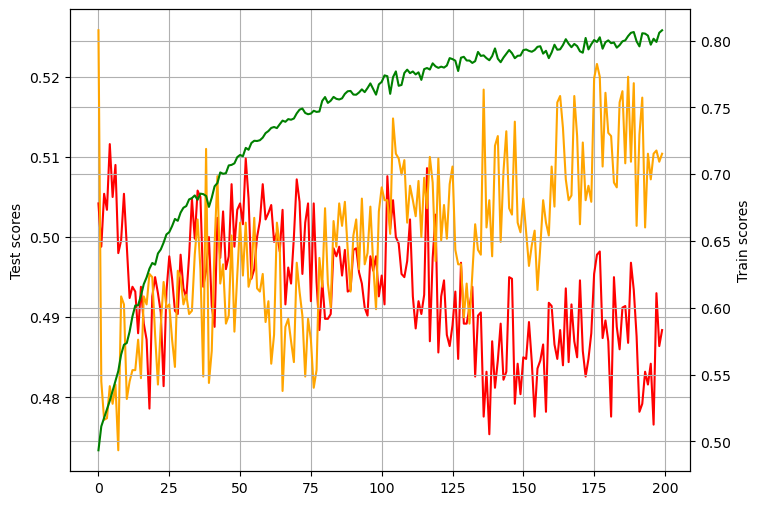

In [28]:
# 加载基本数据
#设置随机数种子
#torch.manual_seed(42)
torch.manual_seed(50)
#torch.manual_seed(65)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
#gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 一些参数
start_sample=0
end_sample=205092

# 定义数据导入
def load_data(end_sample):

    # 取出对应时间跨度的X和Y
    x1 = X_hunhe[start_sample:end_sample, :, :]
    x1 = np.nan_to_num(x1, nan=0)
    y = Y[start_sample:end_sample]
    y=np.nan_to_num(y, nan=0)

    x1_in_sample = x1
    mask = np.any(x1_in_sample[:,:,:769] != 0, axis=(1, 2))
    x1_in_sample = x1_in_sample[mask]
    y_in_sample = y
    y_in_sample = y_in_sample[mask]
    print(x1_in_sample.shape)
    print(y_in_sample.shape)    

    split1 = int(y_in_sample.shape[0] * 0.7)
    split2 = int(y_in_sample.shape[0] * 0.95)
    x1_train = x1_in_sample[:53074, :, :]
    x1_val = x1_in_sample[53074:58074, :, :]
    x1_test = x1_in_sample[58074:, :, :]
    y_train = y_in_sample[:53074, :]
    y_val = y_in_sample[53074:58074, :]
    y_test = y_in_sample[58074:, :]


    # 对训练集进行标准化
    x1_train_std = x1_train[:,:,-2:]
    print(x1_train_std.shape)
    med_x1_train = np.mean(x1_train_std, 0)
    mad_x1_train = np.std(x1_train_std, 0)
    x1_train_std = standardize_data(x1_train_std, med_x1_train, mad_x1_train)
    #769
    #x1_train =x1_train[:,:,:769]
    #769[0]
    #x1_train =x1_train[:,:,685:769]   
    #769+ret+amt
    x1_train = np.concatenate((x1_train[:,:,:769], x1_train_std), axis=2)
    #ret
    #x1_train=x1_train_std[:,:,:1]
    #amt
    #x1_train=x1_train_std[:,:,-1:]
    
    # 对验证集进行标准化
    x1_val_std = x1_val[:,:,-2:]
    print(x1_val_std.shape)
    med_x1_val = np.mean(x1_val_std, 0)
    mad_x1_val = np.std(x1_val_std, 0)
    x1_val_std = standardize_data(x1_val_std, med_x1_val, mad_x1_val)
    x1_val = np.concatenate((x1_val[:,:,:769], x1_val_std), axis=2)
    
    #769
    #x1_val =x1_val[:,:,:769]
    #769[0]
    #x1_val =x1_val[:,:,685:769]    
    #769+ret+amt
    x1_val = np.concatenate((x1_val[:,:,:769], x1_val_std), axis=2)
    #ret
    #x1_val=x1_val_std[:,:,:1]
    #amt
    #x1_val=x1_val_std[:,:,-1:]
    
    # 对测试集进行标准化
    x1_test_std = x1_test[:,:,-2:]
    print(x1_test_std.shape)
    med_x1_test = np.mean(x1_test_std, 0)
    mad_x1_test = np.std(x1_test_std, 0)
    x1_test_std = standardize_data(x1_test_std, med_x1_test, mad_x1_test)
    x1_test = np.concatenate((x1_test[:,:,:769], x1_test_std), axis=2)

    #769
    #x1_test =x1_test[:,:,:769]
    #769[0]
    #x1_test =x1_test[:,:,685:769]
    #769+ret+amt
    x1_test = np.concatenate((x1_test[:,:,:769], x1_test_std), axis=2)
    #ret
    #x1_test=x1_test_std[:,:,:1]
    #amt
    #x1_test=x1_test_std[:,:,-1:]
    
    print(x1_train.shape)
    print(x1_val.shape)
    print(x1_test.shape)
    print(y_train.shape)
    print(y_val.shape)
    print(y_test.shape)

    return x1_train, x1_val, x1_test, y_train, y_val, y_test

def CrossEntropyLoss(logits, y_true):
    # x = y_true
    # y = y_pred
    criterion = nn.CrossEntropyLoss()
    loss = criterion(logits, y_true)
    # loss_fn = nn.BCEWithLogitsLoss()
    # loss = loss_fn(y_pred, y_true)
    return loss

BATCH_SIZE = 256
MAX_EPOCH = 200
epoch_iter = 10 #早停轮数设置
w = 0
loss_name = 'CrossEntropy'

# 定义模型训练和测试的方法
def train(train_dl):
    # 模型的训练状态
    acc = 0  # 训练集准确率
    model.train()
    tqdm_ = tqdm(iterable=train_dl)
    
    loss_list = []
    for i, batch in enumerate(tqdm_):
        # 获得一个批次的数据和标签
        x1, labels = batch
        
        x1 = x1.to(device)
        labels = labels.to(device)
        labels = labels.squeeze().long()
        
        #print(labels.shape)
        out = model(x1)
        #print(out.shape)
        # 损失函数
        if loss_name == 'CrossEntropy':
            loss = CrossEntropyLoss(out, labels)
        loss_list.append(loss.item())
        # 梯度清零
        optimizer.zero_grad()
        # 计算梯度
        loss.backward()
        # 修改权值
        optimizer.step()
        #print(out.shape)
        # print(labels.shape)
        acc += (torch.argmax(out, dim=1) == labels).sum().item()
    # tqdm_.set_description("epoch:{:d} train loss:{:.4f}".format(epoch, loss.item()))
    print(f"train acc:{acc / len(y_train)} train_loss:{sum(loss_list) / len(loss_list)}")
    return acc / len(y_train)

def eval(val_dl):
    # 模型的测试状态
    model.eval()
    acc = 0  # 测试集准确率
    tqdm_ = tqdm(iterable=val_dl)
    for i, batch in enumerate(tqdm_):
        # 获得一个批次的数据和标签
        x1, labels = batch
        x1 = x1.to(device)
        labels = labels.to(device)
        labels = labels.squeeze().long()
        out = model(x1)
        #print(out)
        # 预测正确的数量
        acc+= (torch.argmax(out, dim=1) == labels).sum().item() 
        tqdm_.set_description("epoch:{:d} val {!s}:{:.4f} ".format(epoch, loss_name, acc))
    print(f"val acc:{acc / len(y_val)}")
    return acc / len(y_val)

def test(test_dl):
    # 模型的测试状态
    model_test.eval()
    test_acc=0  # 测试集准确率
    tqdm_test = tqdm(iterable=test_dl)
    for i, batch in enumerate(tqdm_test):
        # 获得一个批次的数据和标签
        x1_test, labels_test = batch
        x1_test = x1_test.to(device)
        labels_test = labels_test.to(device)
        labels_test = labels_test.squeeze().long()
        y_pred = model(x1_test)
        #print(out)
        # 预测正确的数量
        test_acc+= (torch.argmax(y_pred, dim=1) == labels_test).sum().item() 
    print(f"test acc:{test_acc / len(y_test)}")
    return test_acc / len(y_test)


if __name__ == '__main__':

    x1_train, x1_val, x1_test,y_train, y_val,y_test = load_data(205092)
    #x1_train, x1_val ,y_train, y_val = load_data(60)    
    print('data finish')

    train_ds = Mydataset(x1_train, y_train)
    train_dl = DataLoader(train_ds, batch_size = BATCH_SIZE)

    val_ds = Mydataset(x1_val, y_val)
    val_dl = DataLoader(val_ds, batch_size = BATCH_SIZE)

    test_ds = Mydataset(x1_test, y_test)
    test_dl = DataLoader(test_ds, batch_size = BATCH_SIZE)
    # 定义模型
    model = MyModel()
    model.to(device)
    # 定义优化器
    #optimizer = optim.Adam(model.parameters(), lr=0.0007)# 随机梯度下降
    #optimizer = optim.SGD(model.parameters(), lr=0.0007, momentum=0.9, nesterov=True, weight_decay=1e-4)
    #optimizer = optim.AdamW(model.parameters(), lr=0.0008)
    optimizer = optim.AdamW(model.parameters(), lr=0.0008, weight_decay=0.05)
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1) # 学习率衰减step_size可设置
    #scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.001) #热重启学习率
    # 记录学习率和 epoch 数组
    lr_history = []
    epoch_history = []

    max_acc = -10000
    max_epoch = 0
    #记录train_ic数组和ic数组
    train_list = []
    val_list = []
    # 定义保存模型参数的列表和计数器
    test_list=[]
    for epoch in range(MAX_EPOCH):
        train_acc = train(train_dl)
        acc = eval(val_dl)

        train_list.append(train_acc)
        val_list.append(acc)

        if acc > max_acc:
            max_acc = acc
            max_epoch = epoch
            model_path = f'model/gru_model/'
            torch.save(model, model_path + 'gru_model' + '.pt')
        else:
            ...
            #if epoch - max_epoch >= epoch_iter:
            #    break
        # 更新学习率
        #scheduler.step()
        
        # 记录学习率和 epoch
        lr_history.append(optimizer.param_groups[0]['lr'])
        epoch_history.append(epoch)

        # #predict
        model_test = MyModel()
        # 加载模型
        model_path = f'model/gru_model/'
        print('--------------------------------')
        print(model_path + 'gru_model' + '.pt')
        print('--------------------------------')
        model_test = torch.load(model_path +  'gru_model' + '.pt')
        test_acc=test(test_dl)
        test_list.append(test_acc)

    # 创建包含一个子图和共享 x 轴的第二个 y 轴的图形
    fig, ax1 = plt.subplots(figsize=[8, 6])
    ax2 = ax1.twinx()
    # # 绘制学习率随时间的变化折线图
    # ax1.plot(epoch_history, lr_history, label='learning_rate', color='blue')
    # ax1.set_xlabel('Epoch')
    # ax1.set_ylabel('Learning rate')
    # ax1.set_title('Learning rate and scores')
    # ax1.tick_params(axis='y', labelcolor='blue')
    # 绘制验证分数的折线图
    ax1.plot(np.arange(epoch + 1), val_list, label='valid_scores', color='red')
    ax1.set_ylabel('Valid scores')
    ax1.tick_params(axis='y', labelcolor='black')
    # 绘制test分数的折线图
    ax1.plot(np.arange(epoch + 1), test_list, label='test_scores', color='orange')
    ax1.set_ylabel('Test scores')
    ax1.tick_params(axis='y', labelcolor='black')
    # 绘制训练分数的折线图
    ax2.plot(np.arange(epoch + 1), train_list, label='train_scores', color='green')
    ax2.set_ylabel('Train scores')
    ax2.tick_params(axis='y', labelcolor='black')
    # # 绘制验证分数的折线图
    # ax2.plot(np.arange(epoch + 1), val_list, label='valid_scores', color='red')
    # ax2.set_ylabel('Valid scores')
    # ax2.tick_params(axis='y', labelcolor='black')
    # # 绘制test分数的折线图
    # ax2.plot(np.arange(epoch + 1), test_list, label='test_scores', color='orange')
    # ax2.set_ylabel('Test scores')
    # ax2.tick_params(axis='y', labelcolor='black')
    
    # 添加网格线
    ax1.grid(True)
    ax2.grid(True)
    # 显示图形
    plt.show()